In [63]:
!pip install pyforest

In [0]:
import pyforest
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('corona_data.csv')
df.head(2)

<IPython.core.display.Javascript object>

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,1
1,75,102,1,0,0,1


In [66]:
df.infection_Probability.value_counts()

1    5133
0    1971
Name: infection_Probability, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

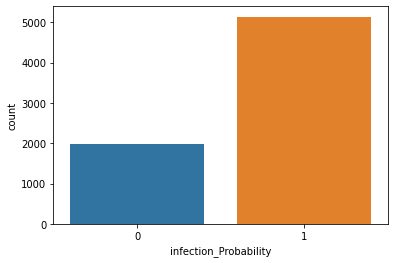

In [67]:
sns.countplot(df.infection_Probability)
plt.show()

# Condition -**1**


### Fever > 100
### Bodypains =1
### runnyNose =1
### breath = 1

## return --> 1

In [0]:
cond_1 =(df['Fever']>100) & (df['BodyPains']==1) & (df['RunnyNose']==1) & (df['Difficulty_in_Breath']==1)

In [0]:
df['infection_Probability'][cond_1] = 1

In [70]:
df[cond_1]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
6,44,103,1,1,1,1
7,57,103,1,1,1,1
47,90,105,1,1,1,1
48,4,105,1,1,1,1
67,72,103,1,1,1,1
...,...,...,...,...,...,...
7019,58,104,1,1,1,1
7030,13,107,1,1,1,1
7070,38,102,1,1,1,1
7098,83,103,1,1,1,1


# condition-2

### Age > 60
        (and)
### Fever > 99
        (and)
### runnyNose =1
        (and)     
 ### breath = 1
     (or)
### Bodypains =1

##return - 1

In [0]:
cond_2 = (df['Age']>=60) & (df['Fever']>99) & (df['RunnyNose']==1) &  (df['Difficulty_in_Breath']==1) | (df['BodyPains']==1)

In [0]:
df['infection_Probability'][cond_2] = 1

In [73]:
df[cond_2]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,1
1,75,102,1,0,0,1
6,44,103,1,1,1,1
7,57,103,1,1,1,1
8,88,99,1,1,1,1
...,...,...,...,...,...,...
7093,61,98,1,0,0,1
7096,76,98,1,1,0,1
7097,57,96,1,0,0,1
7098,83,103,1,1,1,1


In [74]:
df.infection_Probability.value_counts()

1    5133
0    1971
Name: infection_Probability, dtype: int64

# Condition - 3:

### Fever > 99
        (and)
### runnyNose =0
        (and)     
### breath = 0
     (and)
### Bodypains =0

##return - 0

In [0]:
cond_3 =(df['Fever']>99) & (df['BodyPains']==0) & (df['RunnyNose']==0) & (df['Difficulty_in_Breath']==0)

In [0]:
df['infection_Probability'][cond_3] = 0

In [77]:
df[cond_3]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
16,36,107,0,0,0,0
18,17,104,0,0,0,0
21,70,108,0,0,0,0
27,7,108,0,0,0,0
38,70,101,0,0,0,0
...,...,...,...,...,...,...
7082,97,107,0,0,0,0
7090,42,103,0,0,0,0
7095,59,101,0,0,0,0
7100,22,104,0,0,0,0


In [78]:
df.infection_Probability.value_counts()

1    5133
0    1971
Name: infection_Probability, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

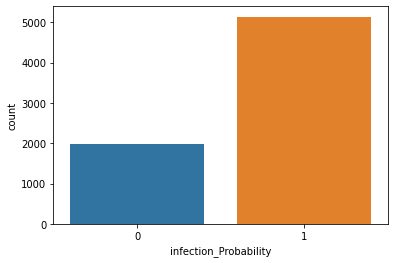

In [79]:
sns.countplot(df.infection_Probability)
plt.show()

In [80]:
df.shape

(7104, 6)

# **Model Building**

In [0]:
X = df.drop('infection_Probability',axis=1).values
Y = df['infection_Probability'].values

In [82]:
X.shape

(7104, 5)

In [0]:
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_score,ShuffleSplit,GridSearchCV

In [0]:
cv = StratifiedKFold(n_splits=5,random_state=11)

In [0]:
kf = KFold(n_splits=5,random_state=100)

In [0]:
for train_index, test_index in cv.split(X,Y):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

In [87]:
X_train.shape

(5684, 5)

In [88]:
X_test.shape

(1420, 5)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score,confusion_matrix

In [0]:
lr = LogisticRegression(class_weight='balanced')

In [91]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
lr_pred = lr.predict(X_test)

In [93]:
lr_acc = accuracy_score(y_test,lr_pred)
lr_acc

0.8021126760563381

In [94]:
# Logistice Regression
cross_val_score(lr,X,Y,cv=cv)

array([0.77128783, 0.80788177, 0.80225194, 0.7635468 , 0.80211268])

In [95]:
lr_cm = confusion_matrix(y_test,lr_pred)
lr_cm

array([[380,  14],
       [267, 759]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

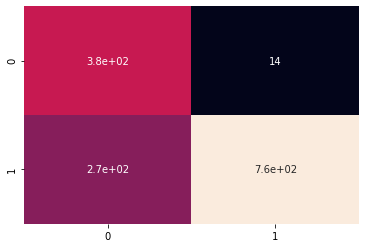

In [96]:
lr_df = pd.DataFrame(data=lr_cm,columns=['0','1'],index=['0','1'])
lr_df

sns.heatmap(lr_df,annot=True,cbar=False)


# Tree model

In [0]:
tr = DecisionTreeClassifier(class_weight='balanced')

In [98]:
tr.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
tr_pred = tr.predict(X_test)

In [100]:
tr_acc = accuracy_score(y_test,tr_pred)
tr_acc

0.8295774647887324

In [101]:
# Tree 
cross_val_score(tr,X,Y,cv=cv)

array([0.80225194, 0.81140042, 0.81210415, 0.79028853, 0.83169014])

In [102]:
tr_cm = confusion_matrix(y_test,tr_pred)
tr_cm

array([[277, 117],
       [125, 901]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

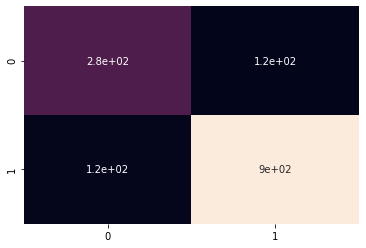

In [103]:
tr_df = pd.DataFrame(data=tr_cm,columns=['0','1'],index=['0','1'])
tr_df

sns.heatmap(tr_df,annot=True,cbar=False)

# Tunig Models

In [0]:
def find_best_model(X,Y):
    algos = {
        
        'logistic_reg':{
            'model':LogisticRegression(class_weight='balanced'),
        'params' :{
            'penalty':['l1','l2'],
            'C':[0.0001,0.001,0.01,0.1,1.0,10,100,1000]
        }
    },
        
    'DT_clf':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy'],
            'max_depth': [2,4,6,8,12]
        }
    }
    }
    
    
    scores =[]
    
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=567)
    
    for algo_name,config in algos.items():
        gd = GridSearchCV(config['model'],param_grid=config['params'],cv=cv,return_train_score=False)
        gd.fit(X,Y)
        
        scores.append({
            'model':algo_name,
            'best_score':gd.best_score_,
            'best_params':gd.best_params_
            
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [105]:
find_best_model(X_train,y_train)

<IPython.core.display.Javascript object>

,model,best_score,best_params
0,logistic_reg,0.795075,"{'C': 100, 'penalty': 'l2'}"
1,DT_clf,0.807036,"{'criterion': 'gini', 'max_depth': 6}"


In [106]:
dt_clf  = DecisionTreeClassifier(criterion='gini',max_depth=6,class_weight='balanced')
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_pred = dt_clf.predict(X_test)

In [108]:
accuracy_score(y_test,y_pred)

0.8253521126760563

In [109]:
tr_cm = confusion_matrix(y_test,y_pred)
tr_cm

array([[390,   4],
       [244, 782]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

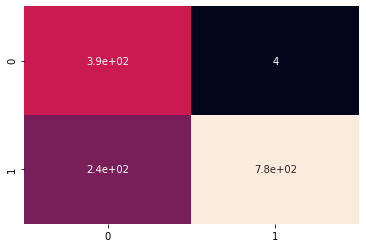

In [110]:
tr_df = pd.DataFrame(data=tr_cm,columns=['0','1'],index=['0','1'])
tr_df
sns.heatmap(tr_df,annot=True,cbar=False)

# **Positive Check**

In [111]:
dt_clf.predict([[67,100,1,1,1]])[0]

1

# **Negative Check**

In [112]:
dt_clf.predict([[67,102,0,0,0]])[0]

0

In [0]:
from sklearn.metrics import f1_score,precision_score,recall_score

In [114]:
f1_score(y_test,y_pred)

0.8631346578366447

In [115]:
precision_score(y_test,y_pred)

0.9949109414758269

In [116]:
recall_score(y_test,y_pred)

0.7621832358674464

Note : Here we can see improvement in  Precission and recall to avoid false -ves

# Export Model

In [0]:
import pickle

In [0]:
with open('corona.pkl','wb') as f:
    pickle.dump(dt_clf,f)

In [0]:
pickle_in = open("corona.pkl","rb")
model = pickle.load(pickle_in)

In [120]:
model.predict([[60,100,0,0,0]])[0]

0

In [121]:
model.predict_proba([[67,102,0,1,1]])[0][1]

1.0

# Lets go to app.py File 